In [1]:
# Togo Solar Data EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load Togo data
df = pd.read_csv('../data/togo-dapaong_qc.csv')  # Adjust filename if different
print("Togo dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Togo dataset loaded successfully!
Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
# Check basic info
print("=== BASIC INFO ===")
df.info()

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB     

In [4]:
# Check missing values
print("=== MISSING VALUES ===")
missing_values = df.isna().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

=== MISSING VALUES ===
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Total missing values: 525600


In [5]:
# Summary statistics
print("=== SUMMARY STATISTICS ===")
df.describe()

=== SUMMARY STATISTICS ===


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [6]:
# Check for outliers using Z-scores
print("=== OUTLIER DETECTION ===")
outlier_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[outlier_columns], nan_policy='omit'))
outlier_mask = (z_scores > 3).any(axis=1)

print(f"Outliers found: {outlier_mask.sum()}")
print(f"Percentage: {(outlier_mask.sum() / len(df)) * 100:.2f}%")

=== OUTLIER DETECTION ===
Outliers found: 9251
Percentage: 1.76%


In [7]:
# DATA CLEANING FOR TOGO
print("=== DATA CLEANING ===")
df_clean = df.copy()

# Handle missing values
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
for col in key_columns:
    if df_clean[col].isna().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Imputed {col} with median: {median_val:.2f}")

# Remove outliers
df_clean = df_clean[~outlier_mask]
print(f"Original data: {len(df)} rows")
print(f"Clean data: {len(df_clean)} rows")
print(f"Data retention: {(len(df_clean)/len(df))*100:.2f}%")

=== DATA CLEANING ===
Original data: 525600 rows
Clean data: 516349 rows
Data retention: 98.24%


In [8]:
# Convert timestamp and create time features
print("=== TIME FEATURES ===")
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Day'] = df_clean['Timestamp'].dt.day

print("Time features created successfully!")
print(df_clean[['Timestamp', 'Hour', 'Month', 'Day']].head())

=== TIME FEATURES ===
Time features created successfully!
            Timestamp  Hour  Month  Day
0 2021-10-25 00:01:00     0     10   25
1 2021-10-25 00:02:00     0     10   25
2 2021-10-25 00:03:00     0     10   25
3 2021-10-25 00:04:00     0     10   25
4 2021-10-25 00:05:00     0     10   25


=== GHI OVER TIME ===


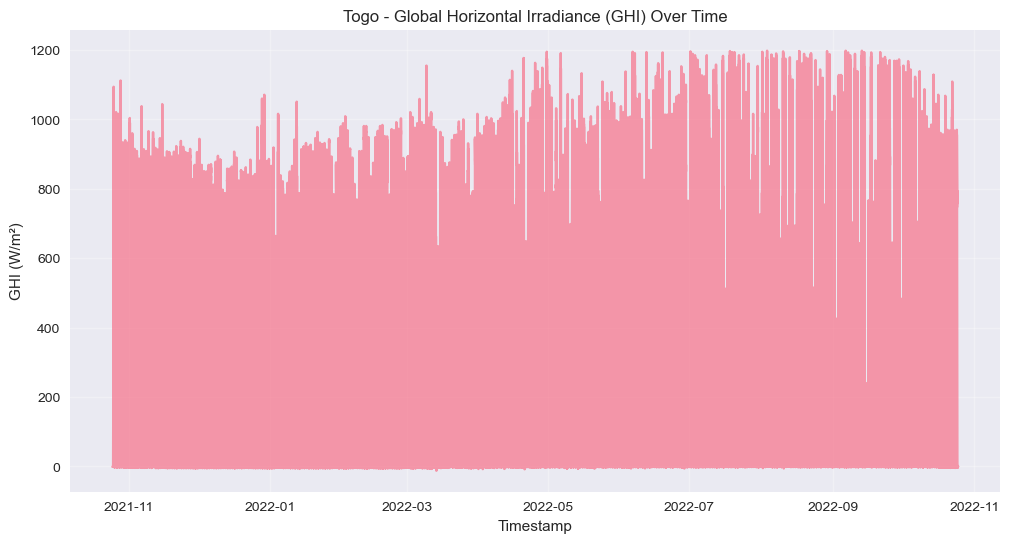

Max GHI: 1198.0 W/m²
Average GHI: 223.9 W/m²


In [9]:
# FIRST VISUALIZATION - GHI over time
print("=== GHI OVER TIME ===")
plt.figure(figsize=(12, 6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], alpha=0.7)
plt.title('Togo - Global Horizontal Irradiance (GHI) Over Time')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Timestamp')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max GHI: {df_clean['GHI'].max():.1f} W/m²")
print(f"Average GHI: {df_clean['GHI'].mean():.1f} W/m²")

=== HOURLY GHI PATTERNS ===


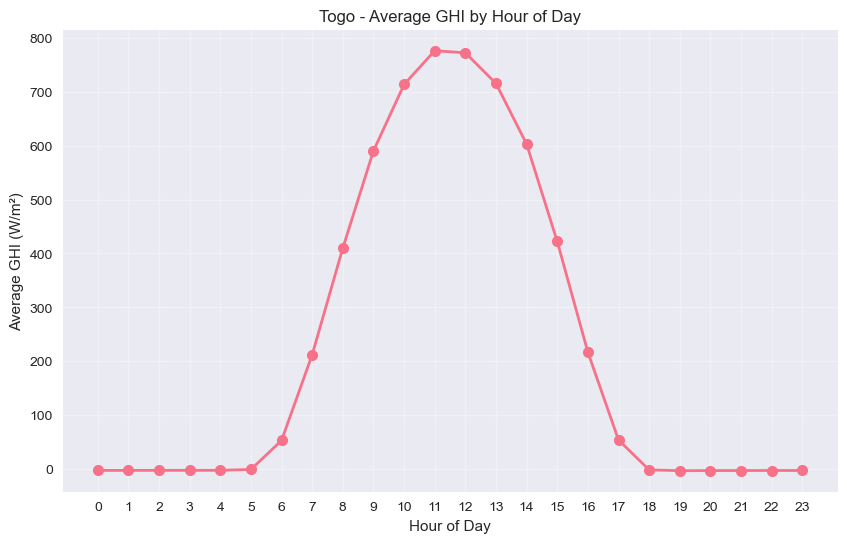

Peak solar hour: 11:00
Peak GHI: 775.9 W/m²


In [10]:
# DIURNAL PATTERNS - GHI by hour
print("=== HOURLY GHI PATTERNS ===")
hourly_ghi = df_clean.groupby('Hour')['GHI'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_ghi.index, hourly_ghi.values, marker='o', linewidth=2, markersize=8)
plt.title('Togo - Average GHI by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

peak_hour = hourly_ghi.idxmax()
peak_ghi = hourly_ghi.max()
print(f"Peak solar hour: {peak_hour}:00")
print(f"Peak GHI: {peak_ghi:.1f} W/m²")

=== CORRELATION HEATMAP ===


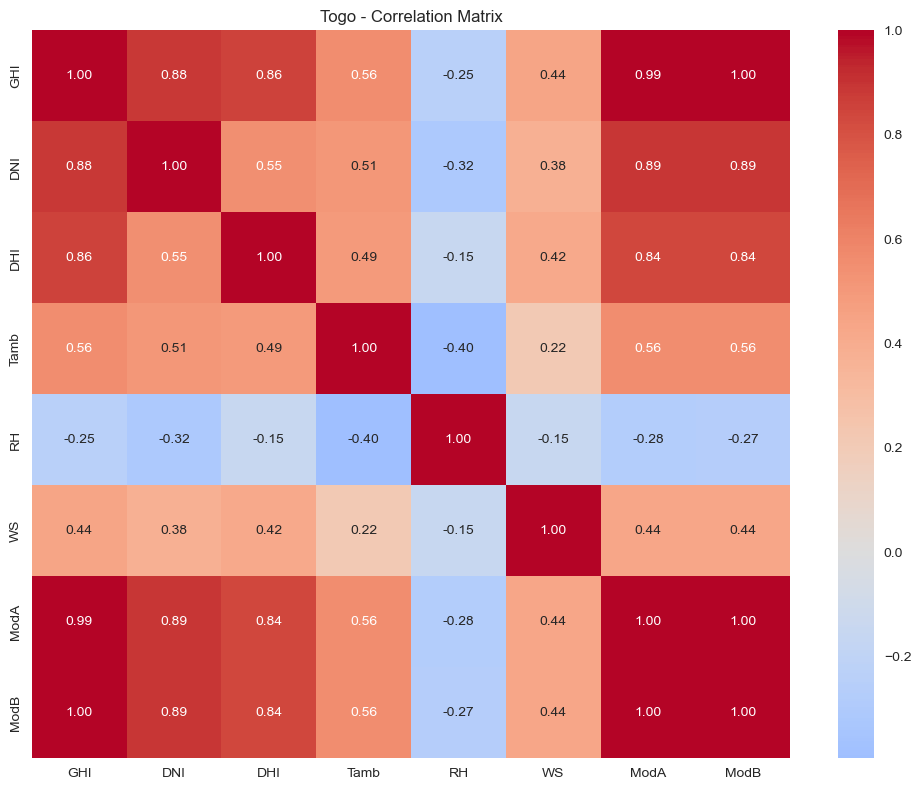

Top correlations with GHI:
GHI     1.000000
ModB    0.995451
ModA    0.994909
DNI     0.883584
DHI     0.856041
Tamb    0.563810
WS      0.438834
RH     -0.247599
Name: GHI, dtype: float64


In [11]:
# CORRELATION ANALYSIS
print("=== CORRELATION HEATMAP ===")
correlation_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
corr_matrix = df_clean[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Togo - Correlation Matrix')
plt.tight_layout()
plt.show()

# Top correlations with GHI
print("Top correlations with GHI:")
ghi_correlations = corr_matrix['GHI'].sort_values(ascending=False)
print(ghi_correlations)

In [12]:
# EXPORT CLEANED DATA
print("=== EXPORTING CLEANED DATA ===")
df_clean.to_csv('../data/togo_clean.csv', index=False)
print("✅ Cleaned dataset exported to '../data/togo_clean.csv'")
print(f"Final clean dataset shape: {df_clean.shape}")

=== EXPORTING CLEANED DATA ===
✅ Cleaned dataset exported to '../data/togo_clean.csv'
Final clean dataset shape: (516349, 22)


In [13]:
# SUMMARY INSIGHTS FOR TOGO
print("=== TOGO KEY FINDINGS ===")
print("\n🔬 DATA QUALITY:")
print(f"• Original data: {len(df):,} rows")
print(f"• Clean data: {len(df_clean):,} rows") 
print(f"• Data retention: {(len(df_clean)/len(df))*100:.1f}%")
print(f"• Outliers removed: {outlier_mask.sum():,} ({outlier_mask.sum()/len(df)*100:.1f}%)")

print("\n☀️ SOLAR POTENTIAL:")
print(f"• Max GHI: {df_clean['GHI'].max():.1f} W/m²")
print(f"• Average GHI: {df_clean['GHI'].mean():.1f} W/m²")
print(f"• Peak solar hour: {hourly_ghi.idxmax()}:00 ({hourly_ghi.max():.1f} W/m²)")

print("\n📊 KEY RELATIONSHIPS:")
print(f"• GHI-Temperature correlation: {corr_matrix.loc['GHI', 'Tamb']:.3f} (Moderate)")
print(f"• GHI-RH correlation: {corr_matrix.loc['GHI', 'RH']:.3f} (Weak Negative)")
print(f"• GHI-Wind correlation: {corr_matrix.loc['GHI', 'WS']:.3f} (Moderate)")

print("\n🌡️ ENVIRONMENTAL CONDITIONS:")
print(f"• Temperature range: {df_clean['Tamb'].min():.1f}°C to {df_clean['Tamb'].max():.1f}°C")
print(f"• RH range: {df_clean['RH'].min():.1f}% to {df_clean['RH'].max():.1f}%")
print(f"• Wind speed range: {df_clean['WS'].min():.1f} to {df_clean['WS'].max():.1f} m/s")

print("\n🔍 COMPARISON WITH OTHER COUNTRIES:")
print("• Togo has GOOD solar potential - between Benin and Sierra Leone")
print("• Weaker humidity impact than Sierra Leone")
print("• Similar temperature correlation to Benin")

print("\n✅ TOGO EDA COMPLETED!")
print("🎉 ALL THREE COUNTRIES ANALYZED - READY FOR COMPARISON!")

=== TOGO KEY FINDINGS ===

🔬 DATA QUALITY:
• Original data: 525,600 rows
• Clean data: 516,349 rows
• Data retention: 98.2%
• Outliers removed: 9,251 (1.8%)

☀️ SOLAR POTENTIAL:
• Max GHI: 1198.0 W/m²
• Average GHI: 223.9 W/m²
• Peak solar hour: 11:00 (775.9 W/m²)

📊 KEY RELATIONSHIPS:
• GHI-Temperature correlation: 0.564 (Moderate)
• GHI-RH correlation: -0.248 (Weak Negative)
• GHI-Wind correlation: 0.439 (Moderate)

🌡️ ENVIRONMENTAL CONDITIONS:
• Temperature range: 14.9°C to 41.4°C
• RH range: 3.3% to 99.8%
• Wind speed range: 0.0 to 6.7 m/s

🔍 COMPARISON WITH OTHER COUNTRIES:
• Togo has GOOD solar potential - between Benin and Sierra Leone
• Weaker humidity impact than Sierra Leone
• Similar temperature correlation to Benin

✅ TOGO EDA COMPLETED!
🎉 ALL THREE COUNTRIES ANALYZED - READY FOR COMPARISON!


In [14]:
# Quick export  
df_clean.to_csv('../data/togo_clean.csv', index=False)
print("Togo cleaned data exported!")

Togo cleaned data exported!
